In [1]:
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd

In [2]:
# 컬럼들 안의 이상 값들
na_values = ['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&']
# float데이터 인데, object로 되어있는 이상 컬럼들
columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Score_Source_3', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']
# csv파일 불러오는 과정 na_values안에 포함된 것들은 결측치로 대체
data = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv', na_values=na_values, encoding='utf-8', engine='python')


In [3]:
data2 =data.drop(['ID','Own_House_Age', 'Score_Source_1', 'Social_Circle_Default', 'Client_Occupation', 'Score_Source_3', 'Type_Organization', 'Credit_Bureau', 'Mobile_Tag'], axis=1)

In [4]:
no_drop_numeri = ['Age_Days',
                  'Child_Count',
                  'Cleint_City_Rating',
                  'Client_Family_Members',
                  'Client_Income',
                  'Credit_Amount',
                  'Employed_Days',
                  'ID_Days',
                  'Loan_Annuity',
                  'Phone_Change',
                  'Population_Region_Relative',
                  'Registration_Days',
                  'Score_Source_2']


In [5]:
no_drop_cat = ['Accompany_Client',
               'Active_Loan',
               'Application_Process_Day',
               'Application_Process_Hour',
               'Bike_Owned',
               'Car_Owned',
               'Client_Contact_Work_Tag',
               'Client_Education',
               'Client_Gender',
               'Client_Housing_Type',
               'Client_Income_Type',
               'Client_Marital_Status',
               'Client_Permanent_Match_Tag',
               'Homephone_Tag',
               'House_Own',
               'Loan_Contract_Type',
               'Workphone_Working']


In [6]:
data2.groupby('Default')[no_drop_numeri].median()

,Age_Days,Child_Count,Cleint_City_Rating,Client_Family_Members,Client_Income,Credit_Amount,Employed_Days,ID_Days,Loan_Annuity,Phone_Change,Population_Region_Relative,Registration_Days,Score_Source_2
Default,,,,,,,,,,,,,
0,15848.0,0.0,2.0,2.0,14850.0,51856.2,2296.0,3284.0,2497.050,774.0,0.018850,4532.0,0.572589
1,14381.5,0.0,2.0,2.0,13500.0,49752.0,1449.0,2786.5,2528.325,586.0,0.018801,4067.0,0.443746


In [7]:
data2.isna().sum()

Client_Income                 3622
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Credit_Amount                 3637
Loan_Annuity                  4826
Accompany_Client              1758
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2416
Loan_Contract_Type            3651
Client_Housing_Type           3687
Population_Region_Relative    4868
Age_Days                      3617
Employed_Days                 3666
Registration_Days             3631
ID_Days                       5985
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Score_Source_2      

In [8]:
#그룹별 중앙값 대체
for col in no_drop_numeri :
    data2[col] = data2.groupby('Default')[col].transform(lambda x: x.fillna(x.median()))
#그룹별 최빈값 대체
for col in no_drop_cat :
    vals = data2.groupby(['Default'])[col] \
         .transform(lambda x: x.mode(dropna=False).iloc[0])
    data2[col] = data2[col].fillna(vals)



In [9]:
data2.isna().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Score_Source_2                0
Phone_Change                  0
Default                       0
dtype: i

In [10]:
standard_scaler = StandardScaler()
onehot_encoder = OneHotEncoder()
prep_processor = ColumnTransformer(
     [('standard',standard_scaler,no_drop_numeri),
     ('onehot',onehot_encoder, no_drop_cat),
      
     ],remainder='passthrough'
)


In [11]:
Y = data2['Default']
X = data2.drop('Default', axis=1)

In [109]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [110]:
len(X.columns)

30

In [111]:
prep_processor.fit(train_x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard', StandardScaler(),
                                 ['Age_Days', 'Child_Count',
                                  'Cleint_City_Rating', 'Client_Family_Members',
                                  'Client_Income', 'Credit_Amount',
                                  'Employed_Days', 'ID_Days', 'Loan_Annuity',
                                  'Phone_Change', 'Population_Region_Relative',
                                  'Registration_Days', 'Score_Source_2']),
                                ('onehot', OneHotEncoder(),
                                 ['Accompany_Client', 'Active_Loan',
                                  'Application_Process_Day',
                                  'Application_Process_Hour', 'Bike_Owned',
                                  'Car_Owned', 'Client_Contact_Work_Tag',
                                  'Client_Education', 'Client_Gender',
                                  'Client_Housing_Type', 'Client_Income_Type',
                                  'Client_Marital_Status',
                                  'Client_Permanent_Match_Tag', 'Homephone_Tag',
                                  'House_Own', 'Loan_Contract_Type',
                                  'Workphone_Working'])])

In [112]:
transform_x_train = prep_processor.transform(train_x)
transform_x_test = prep_processor.transform(test_x)


In [113]:
transform_x_test.shape

(24372, 93)

In [114]:
from functools import partial
from keras.layers import LeakyReLU



In [133]:
checkpoint_path_relu = "batch50000_relu_deep_training/model_cp.ckpt"
checkpoint_path_elu = "batch15000_elu_deep_training/model_cp.ckpt"

checkpoint_dir_relu = os.path.dirname(checkpoint_path_relu)
checkpoint_dir_elu = os.path.dirname(checkpoint_path_elu)

relu_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_relu, save_weights_only=False, verbose=1,)
elu_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_elu, save_weights_only=False, verbose=1,)
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=500)

In [116]:
relu_neural_model = tf.keras.models.Sequential(
    [
        keras.layers.Dense(units=186, input_shape=(93,), activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0)),
        keras.layers.Dense(units=186,  activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0)),
        keras.layers.Dense(units=186, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.00)),
        keras.layers.Dense(units=186, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.00)),
        keras.layers.Dropout(0.3),  #0.7 under fitting 
        keras.layers.Dense(units=1, activation='sigmoid'),
        

    ]
    ,name='predict'
)

In [117]:
elu_neural_model = tf.keras.models.Sequential(
    [
        keras.layers.Dense(units=186, input_shape=(93,), activation='elu',kernel_regularizer=tf.keras.regularizers.L2(0)),
        keras.layers.Dense(units=186,  activation='elu', kernel_regularizer=tf.keras.regularizers.L2(0)),
        keras.layers.Dense(units=186, activation='elu', kernel_regularizer=tf.keras.regularizers.L2(0.00)),
        keras.layers.Dense(units=186, activation='elu', kernel_regularizer=tf.keras.regularizers.L2(0.00)),
        keras.layers.Dropout(0.3),  #0.7 under fitting 
        keras.layers.Dense(units=1, activation='sigmoid'),
        

    ]
    ,name='predict'
)

In [118]:
elu_neural_model.summary()

Model: "predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 186)               17484     
                                                                 
 dense_21 (Dense)            (None, 186)               34782     
                                                                 
 dense_22 (Dense)            (None, 186)               34782     
                                                                 
 dense_23 (Dense)            (None, 186)               34782     
                                                                 
 dropout_4 (Dropout)         (None, 186)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 187       
                                                                 
Total params: 122,017
Trainable params: 122,017
Non-trainab

In [134]:
elu_neural_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(from_logits=False,label_smoothing=0),
metrics=['binary_accuracy','Recall','Precision' ] )
relu_neural_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(from_logits=False,label_smoothing=0),
metrics=['binary_accuracy','Recall','Precision' ] )

In [135]:
elu_hist_50000 = elu_neural_model.fit(transform_x_train, train_y.to_numpy(), epochs=2000, callbacks=[elu_cp_callback,earlystop_callback], validation_split=0.2, batch_size=15000)

Epoch 1/2000
5/6 [========================>.....] - ETA: 0s - loss: 2.4575 - binary_accuracy: 0.6667 - recall: 0.4122 - precision: 0.1034
Epoch 1: saving model to batch15000_elu_deep_training\model_cp.ckpt
INFO:tensorflow:Assets written to: batch15000_elu_deep_training\model_cp.ckpt\assets
6/6 [==============================] - 3s 406ms/step - loss: 2.3753 - binary_accuracy: 0.6762 - recall: 0.3957 - precision: 0.1035 - val_loss: 0.2810 - val_binary_accuracy: 0.9172 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/2000
5/6 [========================>.....] - ETA: 0s - loss: 0.2885 - binary_accuracy: 0.9190 - recall: 0.0020 - precision: 0.2000      
Epoch 2: saving model to batch15000_elu_deep_training\model_cp.ckpt
INFO:tensorflow:Assets written to: batch15000_elu_deep_training\model_cp.ckpt\assets
6/6 [==============================] - 1s 261ms/step - loss: 0.2902 - binary_accuracy: 0.9184 - recall: 0.0024 - precision: 0.1145 - val_loss: 0.4330 - val_binary_accuracy: 0.9172

In [25]:
relu_hist_30000 = relu_neural_model.fit(transform_x_train, train_y.to_numpy(), epochs=2000, callbacks=[relu_cp_callback,earlystop_callback], validation_split=0.2, batch_size=30000)


Epoch 1/2000
5/6 [========================>.....] - ETA: 0s - loss: 0.0249 - binary_accuracy: 0.9915 - recall: 0.9398 - precision: 0.9539
Epoch 1: saving model to relu_deep_training\model_cp.ckpt
INFO:tensorflow:Assets written to: relu_deep_training\model_cp.ckpt\assets
6/6 [==============================] - 1s 211ms/step - loss: 0.0248 - binary_accuracy: 0.9915 - recall: 0.9401 - precision: 0.9540 - val_loss: 1.3901 - val_binary_accuracy: 0.8857 - val_recall: 0.2348 - val_precision: 0.2760
Epoch 2/2000
6/6 [==============================] - ETA: 0s - loss: 0.0351 - binary_accuracy: 0.9890 - recall: 0.9163 - precision: 0.9445
Epoch 2: saving model to relu_deep_training\model_cp.ckpt
INFO:tensorflow:Assets written to: relu_deep_training\model_cp.ckpt\assets
6/6 [==============================] - 1s 232ms/step - loss: 0.0351 - binary_accuracy: 0.9890 - recall: 0.9163 - precision: 0.9445 - val_loss: 1.1745 - val_binary_accuracy: 0.8902 - val_recall: 0.2076 - val_precision: 0.2801
Epoch 3/

In [89]:
import joblib

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns

In [66]:
def view_user_callback_graph(callback_hist, train_y, test_y):
    x = callback_hist.epoch
    train_y = callback_hist.history.get(train_y)
    test_y = callback_hist.history.get(test_y)
    plt.figure(figsize=(10, 5))
    # fig.set_facecolor('white')
    sns.lineplot(x=x,y=train_y, label=train_y)
    sns.lineplot(x=x,y=train_y, label=train_y)
    plt.legend()

In [83]:
relu_hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'recall', 'precision', 'val_loss', 'val_binary_accuracy', 'val_recall', 'val_precision'])

In [ ]:
elu_hist_50000.predict()

Text(0, 0.5, 'recall score')

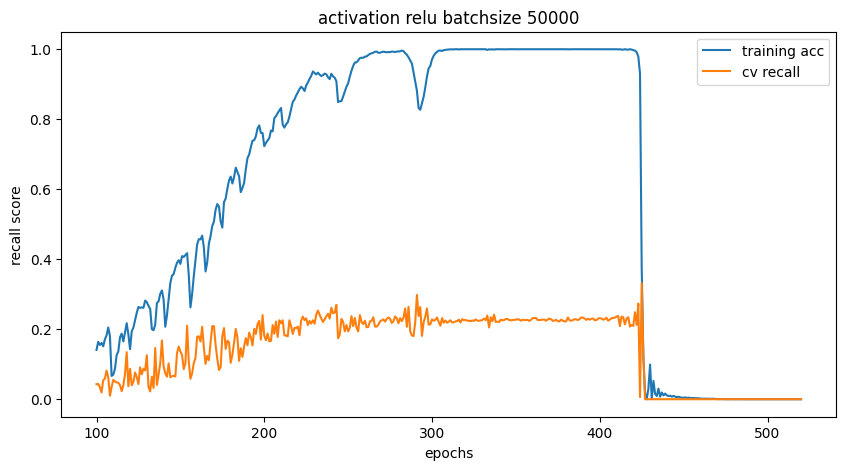

In [136]:
x = elu_hist_50000.epoch
graph_train_y = elu_hist_50000.history.get('recall')
graph_train_y2 = elu_hist_50000.history.get('binary_accuracy')
graph_test_y = elu_hist_50000.history.get('val_recall')
graph_test_y2 = elu_hist_50000.history.get('val_binary_accuracy')
plt.figure(figsize=(10, 5))
# fig.set_facecolor('white')
sns.lineplot(x=x[100:],y=graph_train_y[100:], label='training acc')
# sns.lineplot(x=x,y=graph_train_y2, label='training recall')
sns.lineplot(x=x[100:],y=graph_test_y[100:], label='cv recall')
# sns.lineplot(x=x,y=graph_test_y2, label='cv acc')
plt.legend()
plt.title('activation relu batchsize 50000')
plt.xlabel('epochs')
plt.ylabel('recall score')

Text(0, 0.5, 'recall score')

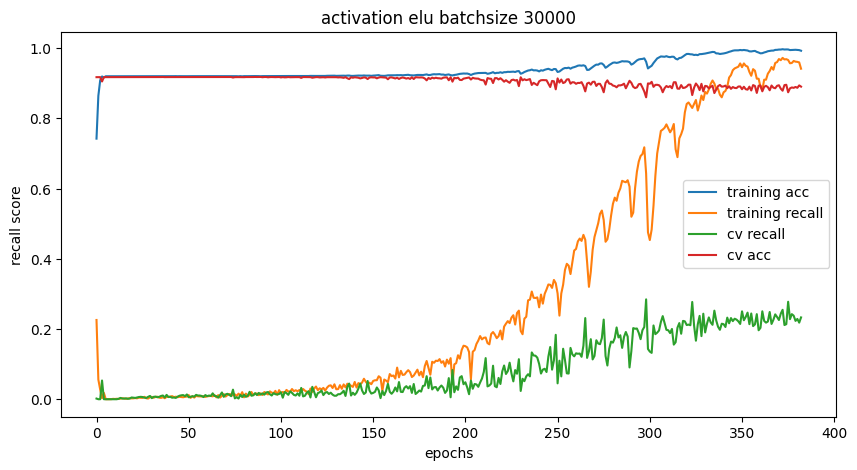

In [107]:
x = elu_hist.epoch
train_y = elu_hist.history.get('recall')
train_y2 = elu_hist.history.get('binary_accuracy')
test_y = elu_hist.history.get('val_recall')
test_y2 = elu_hist.history.get('val_binary_accuracy')
plt.figure(figsize=(10, 5))
# fig.set_facecolor('white')
sns.lineplot(x=x,y=train_y2, label='training acc')
sns.lineplot(x=x,y=train_y, label='training recall')
sns.lineplot(x=x,y=test_y, label='cv recall')
sns.lineplot(x=x,y=test_y2, label='cv acc')
plt.legend()
plt.title('activation elu batchsize 30000')
plt.xlabel('epochs')
plt.ylabel('recall score')

In [43]:
relu_hist.history.get('val_recall')
x= relu_hist.epoch
x = relu_hist.history.get('batch')

In [127]:
elu_pre = elu_neural_model.predict(transform_x_test)
relu_pre = relu_neural_model.predict(transform_x_test)


762/762 [==============================] - 1s 2ms/step


In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

In [128]:
elu = (elu_pre > 0.5).astype(int)
relu = (relu_pre > 0.5).astype(int)


In [131]:
recall_score(test_y, elu), recall_score(test_y, relu)

(0.021838496698831894, 0.18131030980192991)

In [130]:
relu_hist.validation_data

In [25]:
xgb_params = {
    'n_estimators' : [90,100],
    'max_depth' : [3,4,5,6,7,8,],
    'min_child_weight' :[1,2,3,5,10]
}

In [26]:
xgb_model = xgb.XGBClassifier()

In [27]:
gscv_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_params,scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

In [28]:
gscv_xgb.fit(transform_x_train, train_y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 5, 10],
                         'n_estimators': [90, 100]},
             scoring='accuracy', verbose=1)

In [1]:
import joblib

In [29]:
joblib.dump(gscv_xgb, 'gscv_xgb.pkl')

['gscv_xgb.pkl']

In [31]:
recall_score(test_y,gscv_xgb.best_estimator_.predict(transform_x_test) )

0.25393600812595224

In [ ]:
recall_score(test_y,gscv_xgb.best_estimator_.predict(transform_x_test) )


In [33]:
gscv_xgb.best_estimator_.score(transform_x_test,test_y)

0.9373871655998687